In [92]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#imports for splitting data and imputings
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Imports for clustering
from sklearn.cluster import KMeans

#Imports for statistical test
import scipy.stats as stats

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#importying .py files for user defined functions
import wrangle as w
import explore as ex

## Acquire Wrangled Data

In [2]:
train, validate, test = w.wrangle_zillow()
train.shape, validate.shape, test.shape

Using cached csv...


((32877, 22), (14091, 22), (11743, 22))

In [3]:
train.head()

,bathrooms,bedrooms,building_quality,home_sqft,fips,latitude,longitude,lot_sqft,regionidcity,regionidcounty,...,year_built,structure_tax_value,assessed_value,land_tax_value,tax_amount,censustractandblock,logerror,heating_system,land_use,county
67577,2.0,2.0,6.0,815.0,6059.0,33747500.0,-117863000.0,7140.0,47568.0,1286.0,...,1989.0,96379.0,167958.0,71579.0,2215.20,60590750022024.0,0.230662,None,Condominium,Orange
5673,2.0,2.0,8.0,1117.0,6037.0,33820500.0,-118342000.0,986080.0,54722.0,3101.0,...,1963.0,30210.0,95425.0,65215.0,1209.14,60376511022012.0,-0.002682,Central,Condominium,Los Angeles
16346,3.0,4.0,6.0,1469.0,6037.0,33805856.0,-118124873.0,6145.0,46298.0,3101.0,...,1952.0,132547.0,443207.0,310660.0,5404.60,60375742012000.0,0.067708,Floor/Wall,Single Family Residential,Los Angeles
24690,3.0,4.0,6.0,2030.0,6059.0,33606164.0,-117670415.0,8662.0,12773.0,1286.0,...,1968.0,168642.0,412426.0,243784.0,4196.14,60590320031009.0,0.002729,None,Single Family Residential,Orange
29587,1.0,2.0,6.0,864.0,6059.0,33844336.0,-117962041.0,7200.0,16764.0,1286.0,...,1948.0,54268.0,444000.0,389732.0,5314.98,60590868022006.0,0.017012,None,Single Family Residential,Orange


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32877 entries, 67577 to 27996
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bathrooms            32877 non-null  float64
 1   bedrooms             32877 non-null  float64
 2   building_quality     32877 non-null  float64
 3   home_sqft            32877 non-null  float64
 4   fips                 32877 non-null  object 
 5   latitude             32877 non-null  float64
 6   longitude            32877 non-null  float64
 7   lot_sqft             32877 non-null  float64
 8   regionidcity         32877 non-null  object 
 9   regionidcounty       32877 non-null  object 
 10  regionidzip          32877 non-null  object 
 11  rooms                32877 non-null  float64
 12  year_built           32877 non-null  float64
 13  structure_tax_value  32877 non-null  float64
 14  assessed_value       32877 non-null  float64
 15  land_tax_value       32877 non-n

## Initial Exploration with Visualizations

In [5]:
# For the sake of exploration I want to create a variable called age based on a calculation using year_built 
## Create a new column with a calculate age of the home using the year_built column
train['age'] = train.year_built.max() - train.year_built
validate['age'] = validate.year_built.max() - validate.year_built
test['age'] = test.year_built.max() - test.year_built
train.head()

,bathrooms,bedrooms,building_quality,home_sqft,fips,latitude,longitude,lot_sqft,regionidcity,regionidcounty,...,structure_tax_value,assessed_value,land_tax_value,tax_amount,censustractandblock,logerror,heating_system,land_use,county,age
67577,2.0,2.0,6.0,815.0,6059.0,33747500.0,-117863000.0,7140.0,47568.0,1286.0,...,96379.0,167958.0,71579.0,2215.20,60590750022024.0,0.230662,None,Condominium,Orange,27.0
5673,2.0,2.0,8.0,1117.0,6037.0,33820500.0,-118342000.0,986080.0,54722.0,3101.0,...,30210.0,95425.0,65215.0,1209.14,60376511022012.0,-0.002682,Central,Condominium,Los Angeles,53.0
16346,3.0,4.0,6.0,1469.0,6037.0,33805856.0,-118124873.0,6145.0,46298.0,3101.0,...,132547.0,443207.0,310660.0,5404.60,60375742012000.0,0.067708,Floor/Wall,Single Family Residential,Los Angeles,64.0
24690,3.0,4.0,6.0,2030.0,6059.0,33606164.0,-117670415.0,8662.0,12773.0,1286.0,...,168642.0,412426.0,243784.0,4196.14,60590320031009.0,0.002729,None,Single Family Residential,Orange,48.0
29587,1.0,2.0,6.0,864.0,6059.0,33844336.0,-117962041.0,7200.0,16764.0,1286.0,...,54268.0,444000.0,389732.0,5314.98,60590868022006.0,0.017012,None,Single Family Residential,Orange,68.0


**For my MVP, I'm going to create a data frame that only includes the variables I'm most intersted in exploring.**

In [6]:
df = train.copy()

quant_vars = ['latitude', 'longitude', 'assessed_value', 'age', 'home_sqft', 'bathrooms', 'bedrooms', 'building_quality']
cat_vars = ['county', 'fips', 'heating_system']
target = ['logerror']

df = df[quant_vars + cat_vars + target]
df.head()

,latitude,longitude,assessed_value,age,home_sqft,bathrooms,bedrooms,building_quality,county,fips,heating_system,logerror
67577,33747500.0,-117863000.0,167958.0,27.0,815.0,2.0,2.0,6.0,Orange,6059.0,None,0.230662
5673,33820500.0,-118342000.0,95425.0,53.0,1117.0,2.0,2.0,8.0,Los Angeles,6037.0,Central,-0.002682
16346,33805856.0,-118124873.0,443207.0,64.0,1469.0,3.0,4.0,6.0,Los Angeles,6037.0,Floor/Wall,0.067708
24690,33606164.0,-117670415.0,412426.0,48.0,2030.0,3.0,4.0,6.0,Orange,6059.0,None,0.002729
29587,33844336.0,-117962041.0,444000.0,68.0,864.0,1.0,2.0,6.0,Orange,6059.0,None,0.017012


Text(0, 0.5, 'Correlation')

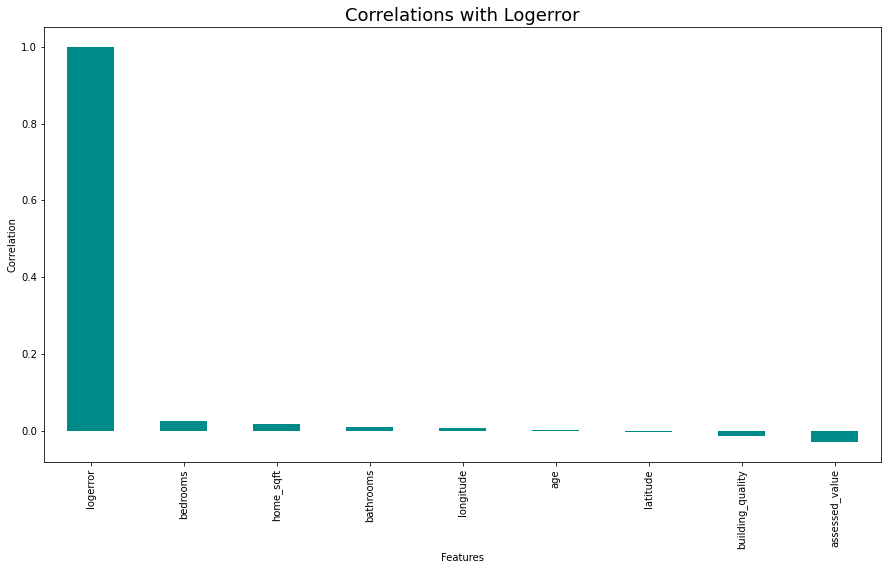

In [7]:
# Checking logerror correlation vs variables I'm intereted in

plt.figure(figsize= (15, 8))
df.corr()['logerror'].sort_values(ascending=False).plot(kind='bar', color = 'darkcyan')
plt.title('Correlations with Logerror', fontsize = 18)
plt.xlabel('Features')
plt.ylabel('Correlation')

<AxesSubplot:>

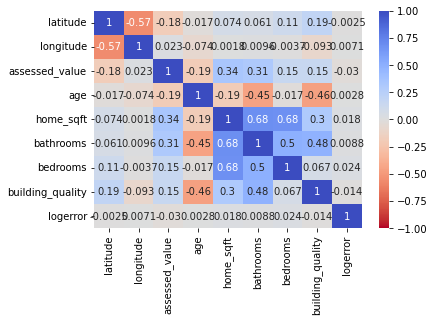

In [8]:
sns.heatmap(df.corr(), cmap= 'coolwarm_r', vmin=-1, vmax=1, annot=True)

In [9]:
df.corr()

,latitude,longitude,assessed_value,age,home_sqft,bathrooms,bedrooms,building_quality,logerror
latitude,1.000000,-0.566970,-0.179907,-0.016556,0.073543,0.061379,0.114548,0.187522,-0.002485
longitude,-0.566970,1.000000,0.022803,-0.074386,0.001812,0.009624,-0.003714,-0.093123,0.007108
assessed_value,-0.179907,0.022803,1.000000,-0.190240,0.343225,0.306771,0.153063,0.152672,-0.030194
age,-0.016556,-0.074386,-0.190240,1.000000,-0.193938,-0.454418,-0.017388,-0.461713,0.002768
home_sqft,0.073543,0.001812,0.343225,-0.193938,1.000000,0.682042,0.679542,0.296965,0.017800
bathrooms,0.061379,0.009624,0.306771,-0.454418,0.682042,1.000000,0.496147,0.479578,0.008756
bedrooms,0.114548,-0.003714,0.153063,-0.017388,0.679542,0.496147,1.000000,0.067288,0.024015
building_quality,0.187522,-0.093123,0.152672,-0.461713,0.296965,0.479578,0.067288,1.000000,-0.014297
logerror,-0.002485,0.007108,-0.030194,0.002768,0.017800,0.008756,0.024015,-0.014297,1.000000


**Takeways:** 
- Nothing seems to be too highly correlated with log error but the top correlations are bedrooms, assessed values, home_sqft, and building quality. 

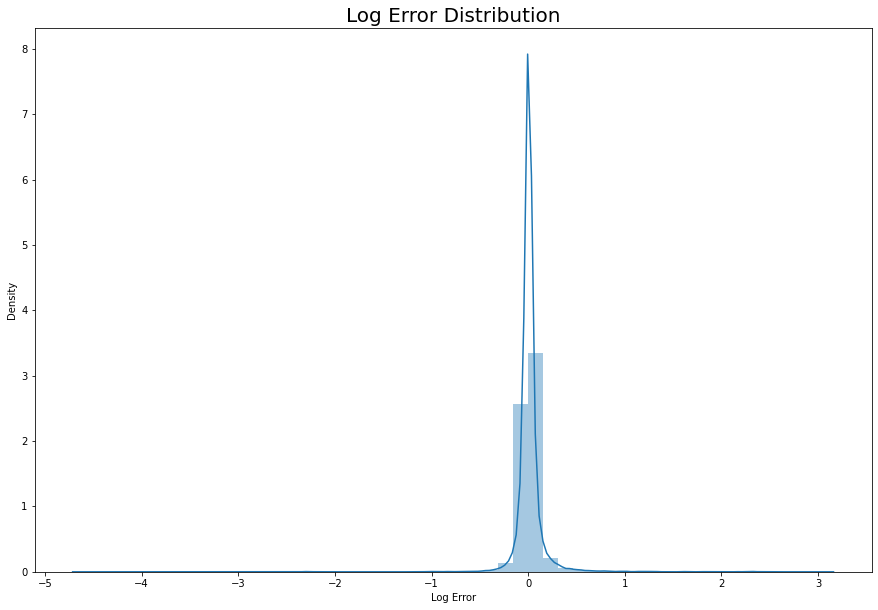

In [10]:
# Let's take a look at the overall log error distribution

plt.figure(figsize= (15, 10))
sns.distplot(df.logerror)
plt.title('Log Error Distribution', fontsize=20)
plt.xlabel('Log Error')
plt.show()


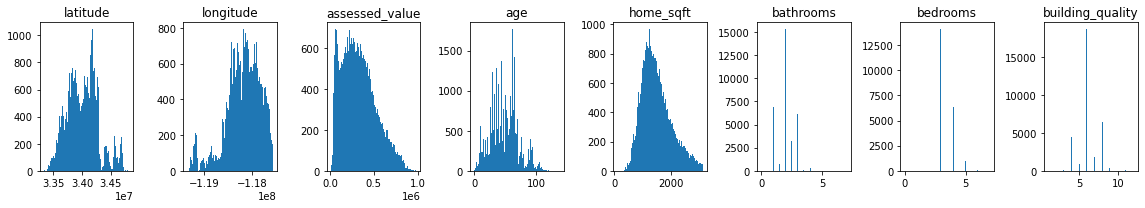

In [11]:
# Let me do some quick univariate exploration of my main continuous variables
w.get_hists(df, quant_vars, 100)

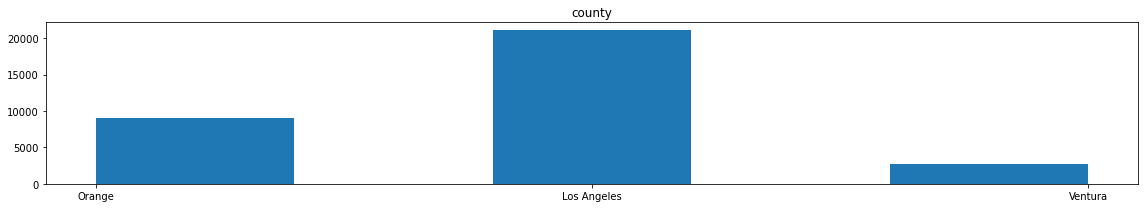

In [12]:
w.get_hists(df, ['county'] , 5)

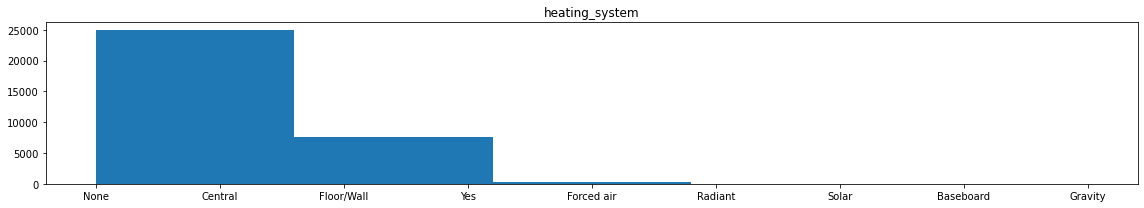

In [13]:
w.get_hists(df, ['heating_system'], 5)

<Figure size 1440x720 with 0 Axes>

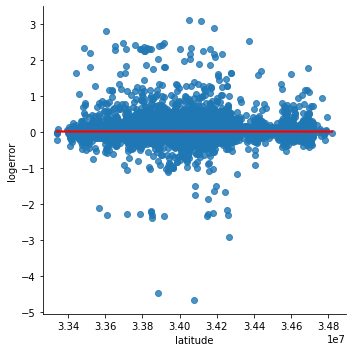

<Figure size 1440x720 with 0 Axes>

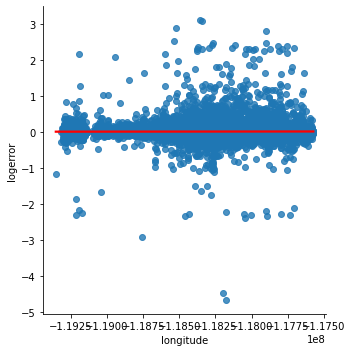

<Figure size 1440x720 with 0 Axes>

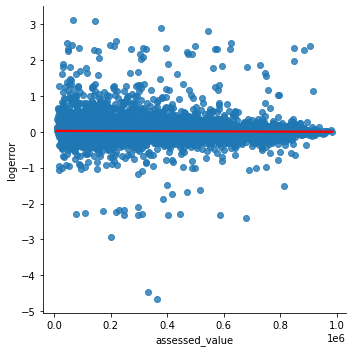

<Figure size 1440x720 with 0 Axes>

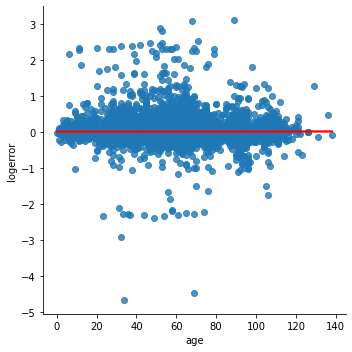

<Figure size 1440x720 with 0 Axes>

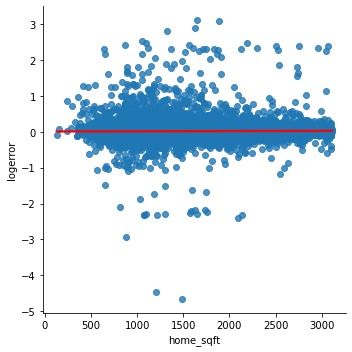

<Figure size 1440x720 with 0 Axes>

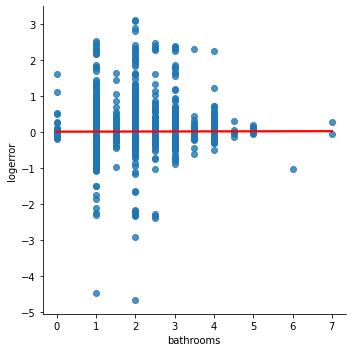

<Figure size 1440x720 with 0 Axes>

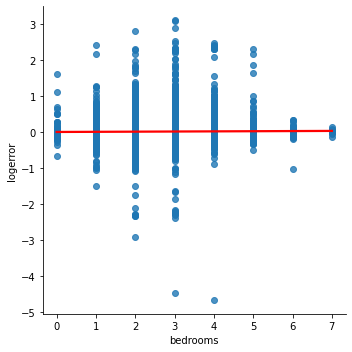

<Figure size 1440x720 with 0 Axes>

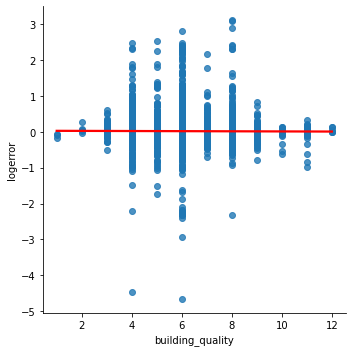

In [14]:
for col in quant_vars:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(20, 10))
        sns.lmplot(x = col, y = 'logerror', data=df, line_kws={'color':'red'})
        plt.show()

## Initial Questions to Answer:

1. Does logerror differ significantly for properties based on their county?
2. Is the age of the property linearly correlated with logerror?
3. Is home square feet linearly correlated with logerror?
4. Is the number of building quality linearly correlated with logerror?

## Statistical Tests

### Question 1: Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Initial Setup

In [15]:
# Set up variables for the county logerrors
la = df[df.county == 'Los Angeles']
orange = df[df.county == 'Orange']
ventura = df[df.county == 'Ventura']

**I want to compare county logerorr mean to population mean but I don't have normal distribution so I will use non-parametric test. (Mann-whitney's)**

### Los Angeles logerror vs. population logerror? 

$H0$: There is no significant difference between the county logerror and the total population logerror.

$Ha$: There is a signifcant difference between the county logerror and the total population logerror.

In [16]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(la.logerror, df.logerror, alternative='two-sided')

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('We fail to reject the null hypothesis. There is a significant difference.')

We fail to reject the null hypothesis. There is a significant difference.


### Orange logerror vs. population logerror? 

$H0$: There is no significant difference between the county logerror and the total population logerror.

$Ha$: There is a signifcant difference between the county logerror and the total population logerror.

In [17]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(orange.logerror, df.logerror, alternative='two-sided')

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('We fail to reject the null hypothesis. There is a significant difference.')

We fail to reject the null hypothesis. There is a significant difference.


### Ventura logerror vs. population logerror? 

$H0$: There is no significant difference between the county logerror and the total population logerror.

$Ha$: There is a signifcant difference between the county logerror and the total population logerror.

In [18]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(ventura.logerror, df.logerror, alternative='two-sided')

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('We fail to reject the null hypothesis. There is a significant difference.')

We fail to reject the null hypothesis. There is a significant difference.


## Question 2: Is the age of the property linearly correlated with logerror?

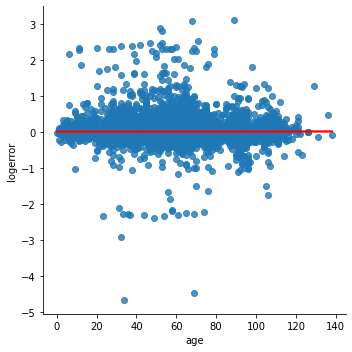

In [19]:
sns.lmplot(data = df, x='age', y='logerror', line_kws={'color':'red'})
plt.show()

*It seems like the newer the home the more log error there is.*

$H0$: There is no linear correlation between age and logerror.

$Ha$: There is a linear correlation between age and logerror.

In [20]:
ex.pearsonr(df.age, df.logerror)

The correlation value between the two variables is 0.002768 and the P-Value is 0.6157069248371366.
----------------------------------------------------------------------------
Since the P value is greater than the alpha, we fail to reject the null hypothesis.


**Takeaway: No significant linear correlation.**

## Question 3: Is home square feet linearly correlated with logerror?

$H0$: There is no linear correlation between home square feet and logerror.

$Ha$: There is a linear correlation between home square feet and logerror.

In [21]:
ex.pearsonr(df.home_sqft, df.logerror)

The correlation value between the two variables is 0.0178 and the P-Value is 0.0012484505383029078.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


**Takeways: There is a small linear correlation between these two variables.**

## Question 4: Is building quality linearly correlated with logerror?

$H0$: There is no linear correlation between building quality and logerror.

$Ha$: There is a linear correlation between building quality and logerror.

In [22]:
ex.pearsonr(df.building_quality, df.logerror)

The correlation value between the two variables is -0.0143 and the P-Value is 0.00953104892810659.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


**Takeways: There is a small linear correlation in the negative direction between these two variables.**

## Clustering

### Scale Data

In [75]:
## Before clustering I'm going to create scaled versions of my train, validate, test splits
## I'll then make a copy of the train sclaed data frame to use for creating clusters

columns_to_scale = list(train.select_dtypes(include=['float64']).columns)

train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test, columns_to_scale)

cluster_df = train_scaled.copy()
cluster_df.head()

,bathrooms,bedrooms,building_quality,home_sqft,fips,latitude,longitude,lot_sqft,regionidcity,regionidcounty,...,land_tax_value,tax_amount,censustractandblock,logerror,heating_system,land_use,county,age,age_location_cluster,size_cluster
67577,0.285714,0.285714,0.454545,0.230460,6059.0,0.275799,0.837155,0.000962,47568.0,1286.0,...,0.102038,0.211513,60590750022024.0,0.629947,None,Condominium,Orange,0.195652,4,3
5673,0.285714,0.285714,0.636364,0.331768,6037.0,0.325149,0.568400,0.141401,54722.0,3101.0,...,0.092759,0.112694,60376511022012.0,0.599863,Central,Condominium,Los Angeles,0.384058,1,1
16346,0.428571,0.571429,0.454545,0.449849,6037.0,0.315249,0.690225,0.000819,46298.0,3101.0,...,0.450648,0.524787,60375742012000.0,0.608938,Floor/Wall,Single Family Residential,Los Angeles,0.463768,1,2
24690,0.428571,0.571429,0.454545,0.638041,6059.0,0.180253,0.945210,0.001180,12773.0,1286.0,...,0.353134,0.406088,60590320031009.0,0.600561,None,Single Family Residential,Orange,0.347826,4,0
29587,0.142857,0.285714,0.454545,0.246897,6059.0,0.341262,0.781586,0.000971,16764.0,1286.0,...,0.565944,0.515984,60590868022006.0,0.602402,None,Single Family Residential,Orange,0.492754,1,3


### Assign Variable Groups to be used as Clusters
#### Cluster 1: Age and Location

In [76]:
X = cluster_df[['age', 'latitude', 'longitude']]

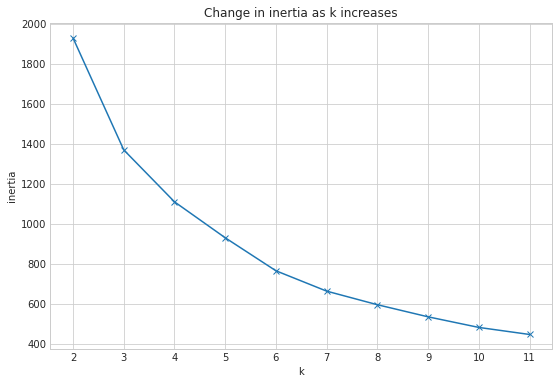

In [77]:
# Use elbow method to determine a good k value
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**Based on this visualization I will go with 5 clusters.**

In [78]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 5, random_state = 123)

#Fit the model
kmeans.fit(X)

#Make predictions and assign the values to the original train data set
train['age_location_cluster'] = kmeans.predict(X)

#### Cluster 2: Property Size

In [79]:
#Copy the train data set and remove unnecessary vars
X = cluster_df[['home_sqft', 'bedrooms', 'bathrooms']]

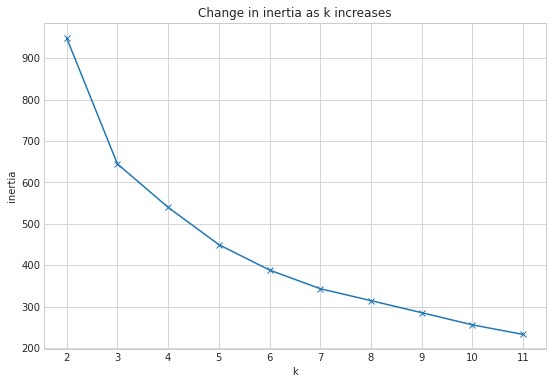

In [80]:
#Now determine number of clusters to make using elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**Based on this visualization I will go with 4 clusters.**

In [81]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 4, random_state = 123)

#Fit the model
kmeans.fit(X)

#Make predictions and assign values to original train data set
train['size_cluster'] = kmeans.predict(X)

#### Cluster 3: Property Value and Quality

In [82]:
#Copy the train data set and remove unnecessary vars
X = cluster_df[['assessed_value', 'building_quality']]

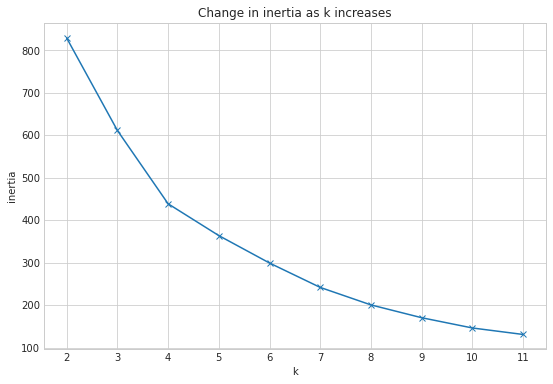

In [ ]:
#Now determine number of clusters to make using elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**Based on this visualization I will go with 4 clusters.**

<Figure size 1152x576 with 0 Axes>

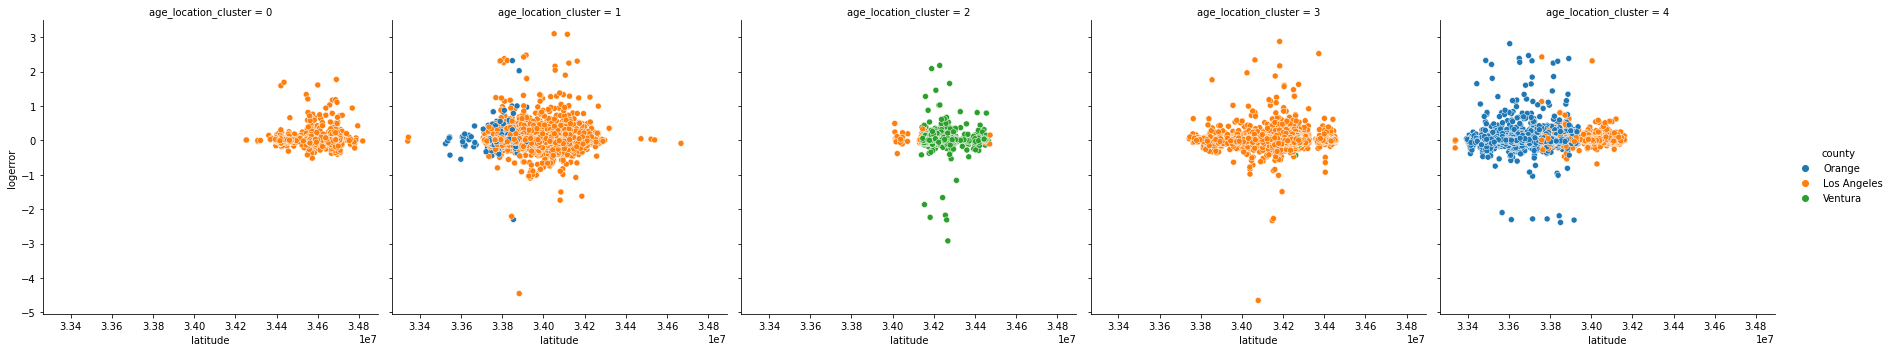

<Figure size 1152x576 with 0 Axes>

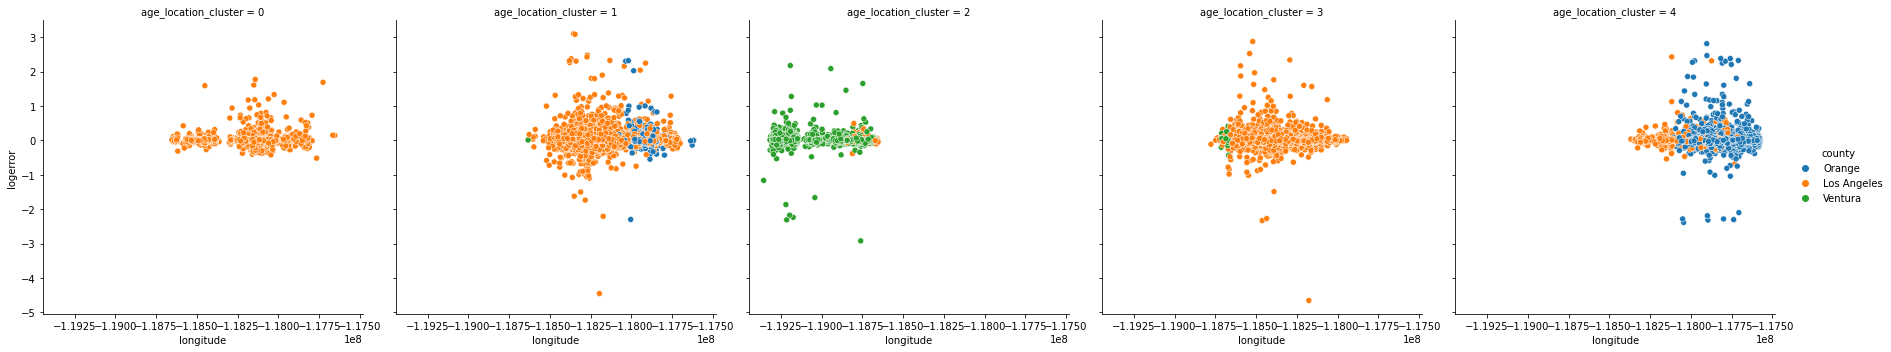

<Figure size 1152x576 with 0 Axes>

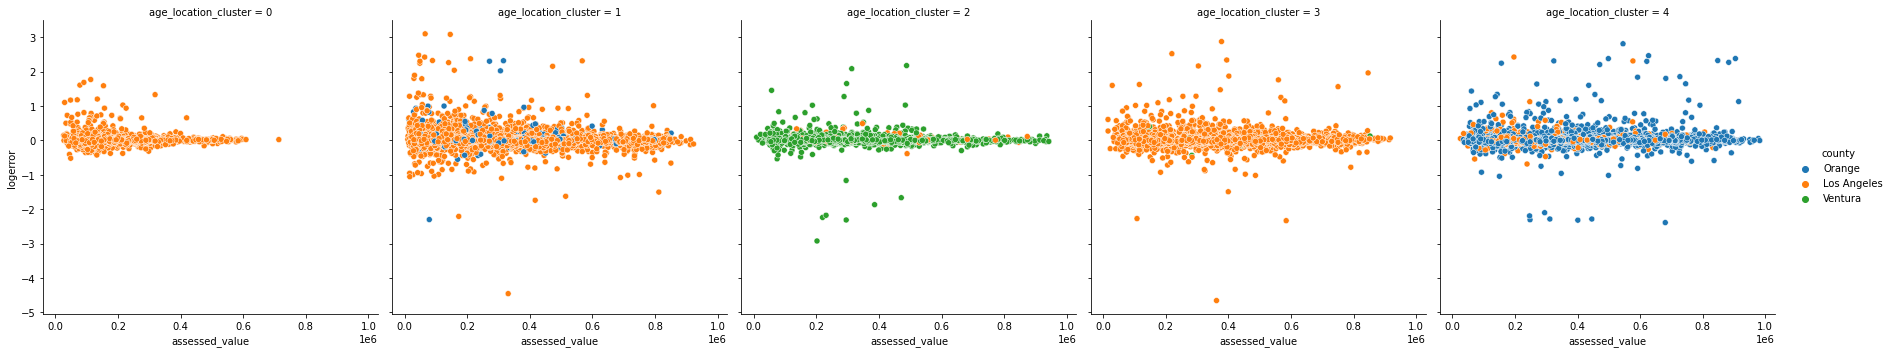

<Figure size 1152x576 with 0 Axes>

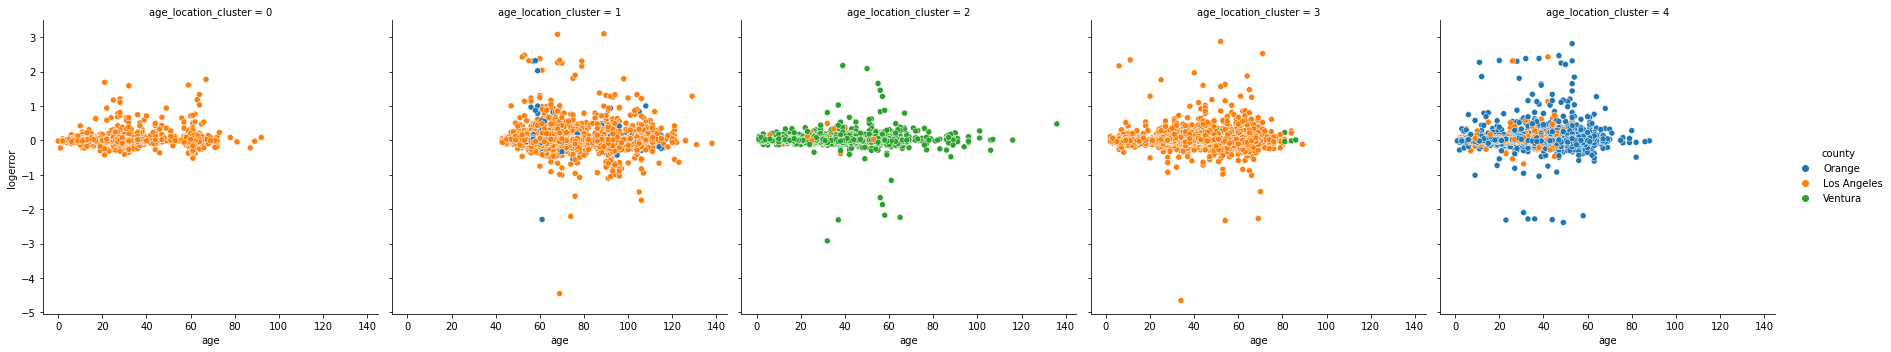

<Figure size 1152x576 with 0 Axes>

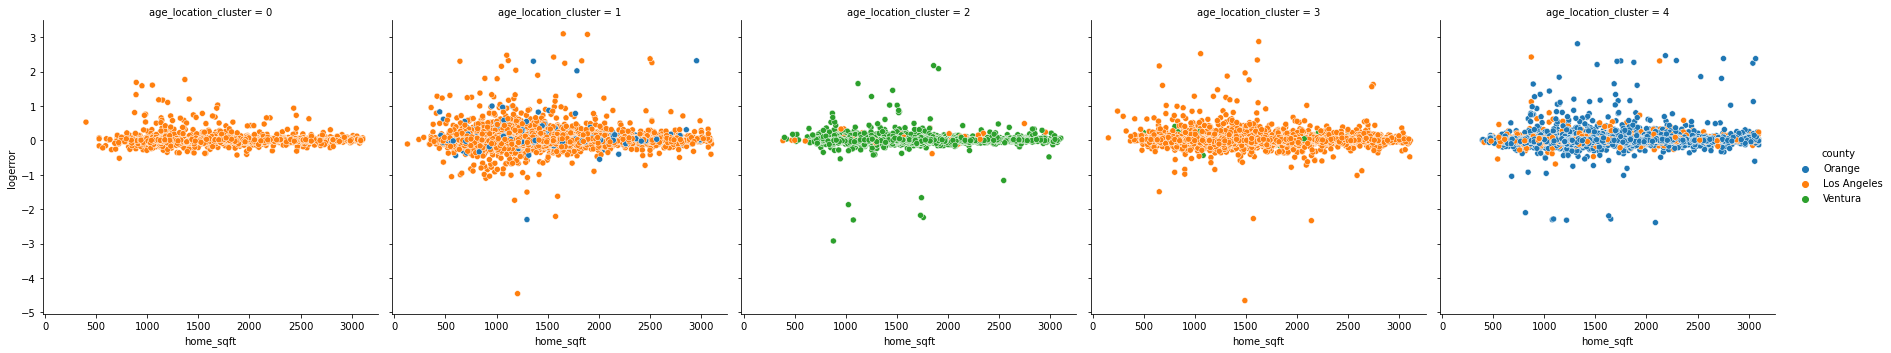

<Figure size 1152x576 with 0 Axes>

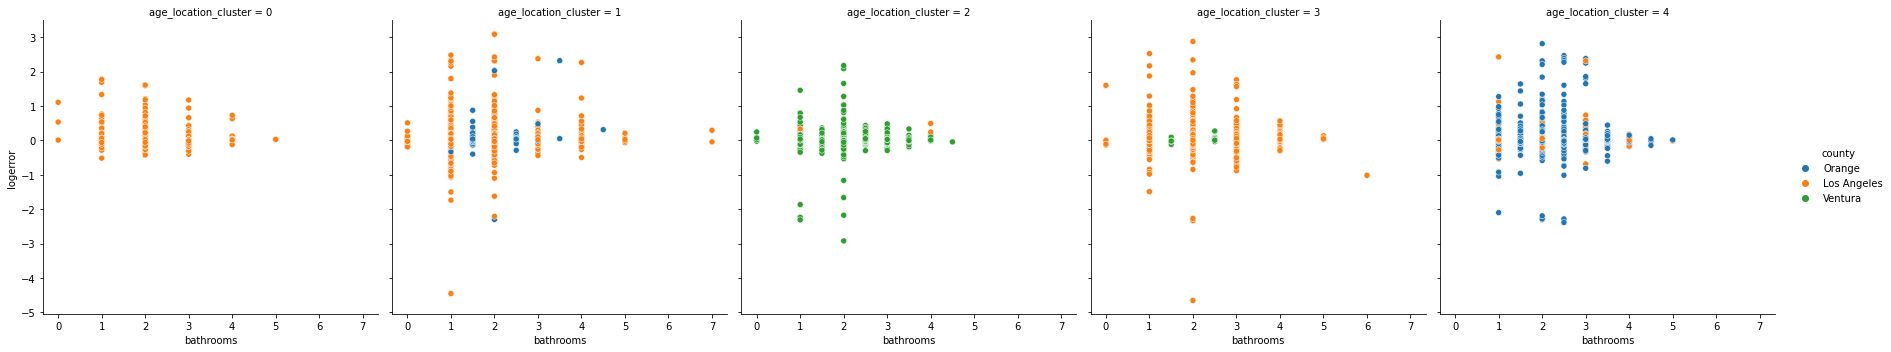

<Figure size 1152x576 with 0 Axes>

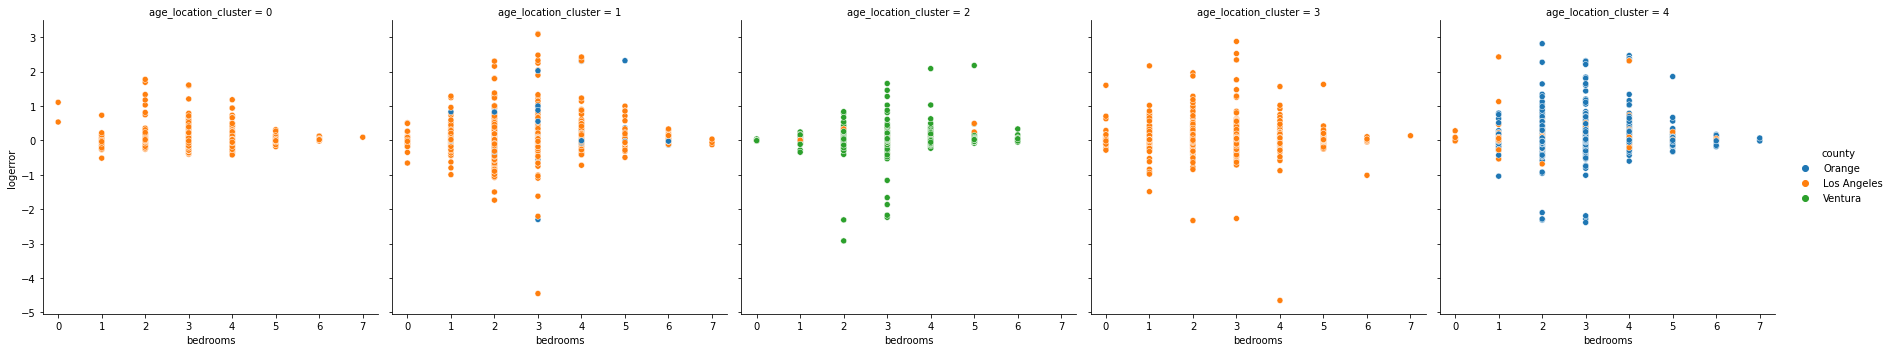

<Figure size 1152x576 with 0 Axes>

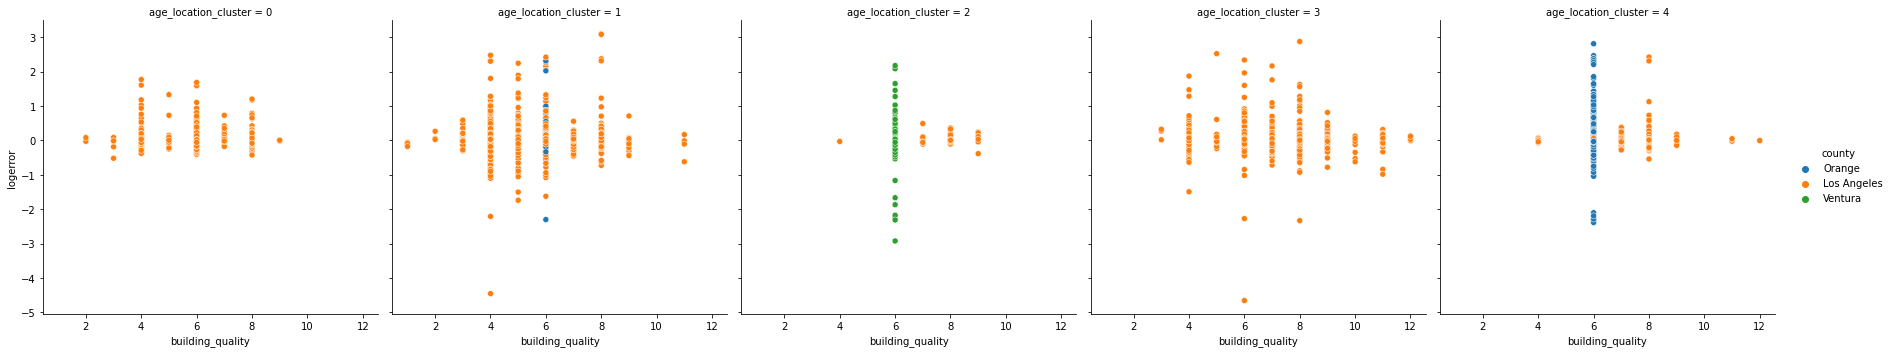

In [48]:
#Visualize the clusters against logerror
for col in quant_vars:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(16, 8))
        sns.relplot(x = col, y = 'logerror', hue = 'county', col = 'age_location_cluster', data = train)
        plt.show()

Text(0.5, 1.0, 'Visualizing Clusters')

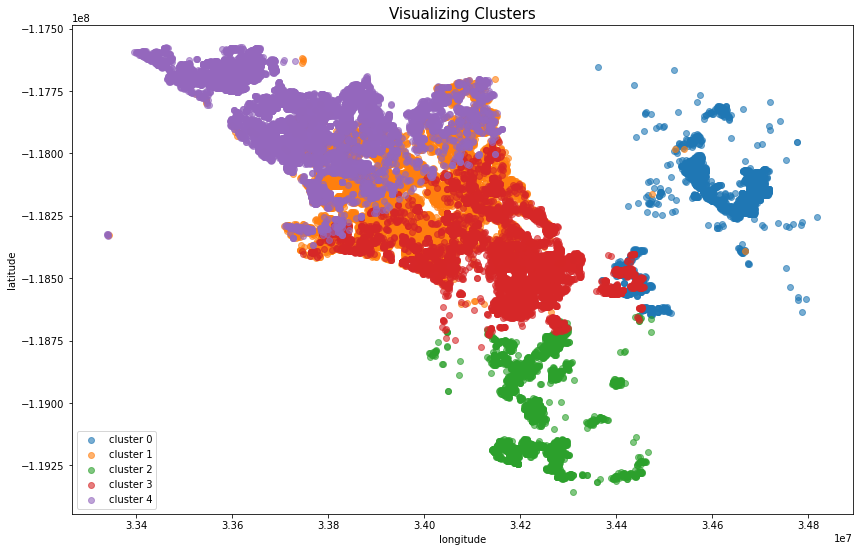

In [90]:
# Calculate cluster centers for visualization

plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('age_location_cluster'):
    plt.scatter(subset.latitude, subset.longitude, label='cluster ' + str(cluster), alpha=.6)


plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Visualizing Clusters', fontsize=15)

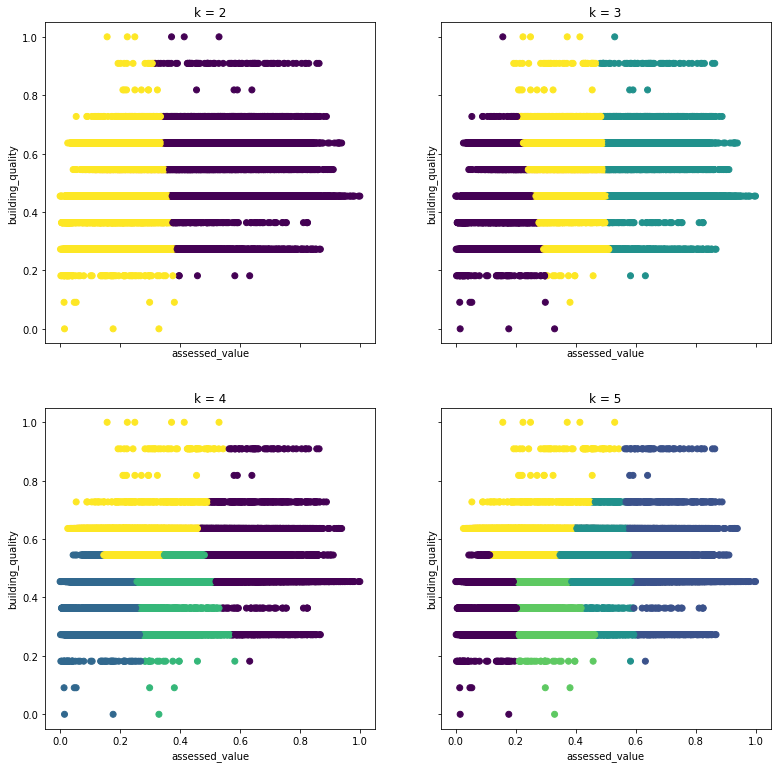

In [89]:
# Let's visualize what our clusters look like using different k values

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.assessed_value, X.building_quality, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='assessed_value', ylabel='building_quality')

In [91]:
## Running out of time for exploring, I'm moving on to modeling to get an MVP